# CIVL562 Environmental Data Collection and Analysis Course Materials
This notebook contains the code I run during lectures. If it gets unwieldy, I may split it into multiple notebooks. <br>
Created by Tim Rodgers, 2024-08-30.

## Intro
In this lecture, we will show some Python environmental data basics. <br>
First, we are working in a "jupyter notebook". Notebooks are a convenient way to organize a scripting workflow, although I find that they get unwieldy for more complicated workflows (e.g. making lots of functions or packages). They are also a good way to share coding in a way that can be understood by a reader. <br>
One important thing to remember is that code should be comprehensible - you want people to be able to follow your code and understand what you are doing. Using lots of comments is helpful for this! Jupyter runs code in "cells", and the cell that this is in is in markdown. Markdown cells are useful for writing longer comments, and they have formatting options like <pre><code> code command here </code></pre> that can help for things like tutorials.

In [ ]:
#The first thing you want to do when running a Jupyter notebook is to import packages. I typically try to have a single import cell that I run 
#when I start or restart a cell.
#Numpy is a package for doing math, especially linear algebra. I have called it "np" for convenience
import numpy as np
#Pandas gives some more functionality to numpy, giving "dataframe" objects that act like R dataframes. 
import pandas as pd
#Matplotlib is Python's basic plotting package
import matplotlib.pyplot as plt
#Seaborn is a matplotlib wrapper which provides some pre-made figure types, and good formatting options. Similar to ggplot in R.
import seaborn as sns
#python debugger (pdb) is a basic python interactive debugger. I find it isn't perfect with Jupyter, but still nice to have 
import pdb

In [ ]:
#Now, lets load some data! I have saved an Excel spreadsheet with data from my 2023 paper that we can play with.
#we will import as a generic dataframe (df)
df = pd.read_excel('Data/lec1_timeseries_Pine8th.xlsx')
#df.head() gives the first 5 rows of the dataframe
df.head()

In [ ]:
#To access data in a dataframe we use different kinds of indices. Lets build a "pltdata" df of bromide effluent concentrations
#df.loc[row,col] lets you access via the name of the column. Note that Python is case sensitive! a colon : is just everything/no selection
pltdata = df.loc[:,['time','Bromide_Coutmeas']]
#We can slice to get the positive numbers by doing a conditional index
pltdata = pltdata.loc[pltdata.time>=0,:]
pltdata.head()


In [ ]:
#Now we can do some plotting! 
#set_style lets you set different default plotting options
sns.set_style('ticks')
sns.set_palette('bright')
sns.histplot(data=pltdata, x='Bromide_Coutmeas')

In [ ]:
#We can see that mostly the data is zero - lots of time when nothing is flowing. Lets add a categorical variable to show flow
#To add a column to a dataframe, just use .loc with the new column name!
pltdata.loc[:,'Q_out'] = df.loc[df.time>=0,'Qout_meas']
pltdata.loc[:,'flowing'] = pltdata.Q_out>0
sns.histplot(data=pltdata, x='Bromide_Coutmeas',hue='flowing');


In [ ]:
#Of course, we probably want to look at this as a time-series not a histogram!
#Truncating to 5 hours
ax = sns.lineplot(data=pltdata, x='time',y='Bromide_Coutmeas',marker='o');
ax.set_xlim([0,5]);

In [ ]:
#Could also look at relationships with a scatterplot
#Is the bromide concentration highest with higher flows?
ax = sns.scatterplot(data=pltdata, x='Q_out',y='Bromide_Coutmeas',marker='o');
#ax.set_xlim([0,5]);

In [ ]:
#Both of these are time varying so lets see what this looks like
#Truncating to 5 hours
fig,ax =plt.subplots(1,1,figsize=(8,4))
sns.lineplot(data=pltdata, x='time',y='Bromide_Coutmeas',marker='o',ax=ax);
#We can add the flow with matplotlib - slightly different syntax!
ax2 = ax.twinx()
ax2.plot(pltdata.time,pltdata.Q_out,color='k',linestyle='--')
ax2.set_ylabel('Q_out',rotation=270,labelpad=10)
ax.set_xlim([0,5]);

## Lecture 2: Data Quality
Dataset to fill in here: https://docs.google.com/spreadsheets/d/1VbGDFBnGlm9Qxm7R6FWsSNDWUMqsLOBPUI-xOH9DbFQ/edit?gid=0#gid=0

In [73]:
#First, we will import our typing speed dataset
tsdf = pd.read_csv('Data/lec2_typingspeed.csv')
tsdf

,Person,Trial 1,Trial 2,Trial 3
0,Participant 1,48,50,55
1,Participant 2,68,63,79
2,Participant 3,79,59,58
3,Participant 4,76,77,60
4,Participant 5,66,56,65
5,Participant 6,53,66,53
6,Participant 7,69,57,69
7,Participant 8,55,69,60
8,Participant 9,80,59,75
9,Participant 10,63,53,75


In [75]:
#First, lets calculate the average and standard deviation for each person
tsdf.loc[:,'mean'] = tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=1)
#Pandas calculates the sample standard deviation ()
tsdf.loc[:,'sd_sample'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=1)
tsdf.loc[:,'sd_pop'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=1,ddof=0)
tsdf.loc[:,['Person','mean','sd_sample','sd_pop']]

,Person,mean,sd_sample,sd_pop
0,Participant 1,51.000000,3.605551,2.943920
1,Participant 2,70.000000,8.185353,6.683313
2,Participant 3,65.333333,11.846237,9.672412
3,Participant 4,71.000000,9.539392,7.788881
4,Participant 5,62.333333,5.507571,4.496913
5,Participant 6,57.333333,7.505553,6.128259
6,Participant 7,65.000000,6.928203,5.656854
7,Participant 8,61.333333,7.094599,5.792716
8,Participant 9,71.333333,10.969655,8.956686
9,Participant 10,63.666667,11.015141,8.993825


In [86]:
#tsdf
ndf

Trial 1                                                 66.375
Trial 2                                                 61.125
Trial 3                                                 66.375
sd_sample    Trial 1    10.818965
Trial 2     8.007288
Tria...
dtype: object

In [105]:
#We can also look at the class mean across trials
tdf = pd.DataFrame(tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=0),columns=['Mean']) #Note capital here as "mean" is already a pandas method
tdf.loc[:,'sd_sample'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=0)
tdf.loc[:,'n'] = tsdf.loc[:,'Trial 1':'Trial 3'].count(axis=0)
#And in total
print('Total Mean')
print(tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=0).mean())
tdf

Total Mean
64.625


,Mean,sd_sample,n
Trial 1,66.375,10.818965,16
Trial 2,61.125,8.007288,16
Trial 3,66.375,8.943340,16


In [115]:
#Confidence Interval - did people get better? lets see how different the 95% confidence intervals are 
import scipy.stats
#First, we can do this manually
alpha = 0.05
tdf.loc[:,'2_5'] = tdf.Mean - tdf.sd_sample/np.sqrt(tdf.n) * scipy.stats.t.ppf((1 + (1-alpha)) / 2., tdf.n-1)
tdf.loc[:,'97_5'] = tdf.Mean + tdf.sd_sample/np.sqrt(tdf.n) * scipy.stats.t.ppf((1 + (1-alpha)) / 2., tdf.n-1)
tdf

,Mean,sd_sample,n,2_5,97_5
Trial 1,66.375,10.818965,16,60.609981,72.140019
Trial 2,61.125,8.007288,16,56.858217,65.391783
Trial 3,66.375,8.943340,16,61.609430,71.140570


In [119]:
#Or, calculate directly with scipy
scipy.stats.t.interval((1-alpha),tdf.n-1,loc=tdf.Mean,scale=tdf.sd_sample/np.sqrt(tdf.n))

(array([60.60998058, 56.85821722, 61.60943042]),
 array([72.14001942, 65.39178278, 71.14056958]))

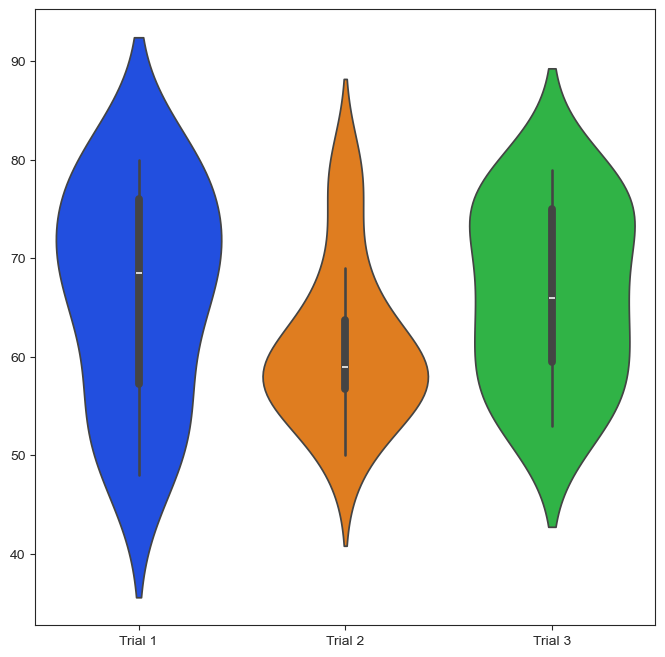

In [112]:
fig,ax = plt.subplots(figsize=(8,8))
sns.violinplot(data=tsdf.loc[:,'Trial 1':'Trial 3'],ax=ax);